In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
data = pd.read_csv(r'C:\Users\rashi\Downloads\dataset1-master\dataset1-master\abalone.csv')

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

there are 4177 rows and 9 columns in dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


there is 7 float64 , 1 int64 , 1 object in this data

In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

there is no null value in this dataset

In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
NULLS=data[data.isnull().any(axis=1)]
NULLS.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [9]:
data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [10]:
data.Rings.value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [11]:
data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [12]:
data.Sex.value_counts().sort_index()

F    1307
I    1342
M    1528
Name: Sex, dtype: int64

there is 1307 females , 1528 males , 1342 infants in this dataset

In [13]:
data['Sex'].replace(['M', 'F', 'I'],[0,1,2], inplace=True)
print(data.head())

   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    0   0.455     0.365   0.095        0.5140          0.2245   
1    0   0.350     0.265   0.090        0.2255          0.0995   
2    1   0.530     0.420   0.135        0.6770          0.2565   
3    0   0.440     0.365   0.125        0.5160          0.2155   
4    2   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


in this we have replaced male with 0 , female with 1 , infants with 2

<AxesSubplot:xlabel='Rings', ylabel='count'>

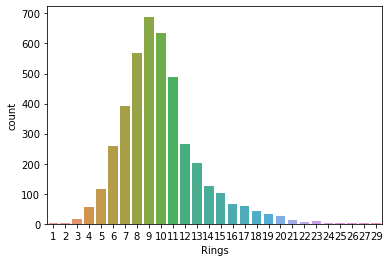

In [14]:
sns.countplot(x='Rings', data=data)

>600 abalone have 9 rings 

<AxesSubplot:>

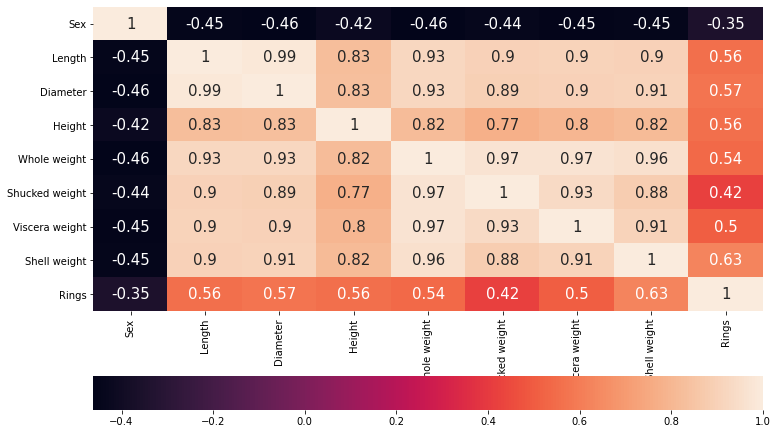

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cbar_kws={'orientation':'horizontal'},annot_kws={'size':15})

In [17]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [18]:
data.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

[Text(0.5, 0, 'sex'), Text(0, 0.5, 'rings'), Text(0.5, 1.0, 'Abalone')]

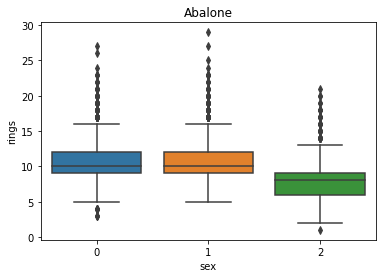

In [19]:
bx = sns.boxplot(x="Sex", y='Rings', data = data)     #bivariate analysis
bx.set(xlabel='sex', ylabel='rings', title='Abalone')

there are outliers in this column

[Text(0.5, 0, 'sex'), Text(0, 0.5, 'rings'), Text(0.5, 1.0, 'abalone ratings')]

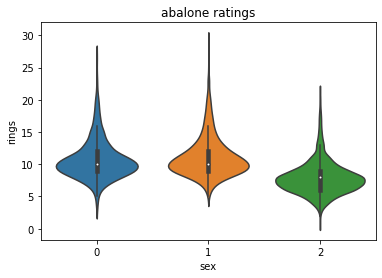

In [20]:
bx = sns.violinplot(x="Sex", y='Rings', data = data)
bx.set(xlabel='sex', ylabel='rings', title='abalone ratings')

[Text(0.5, 0, 'sex'), Text(0, 0.5, 'rings'), Text(0.5, 1.0, 'abalone ratings')]

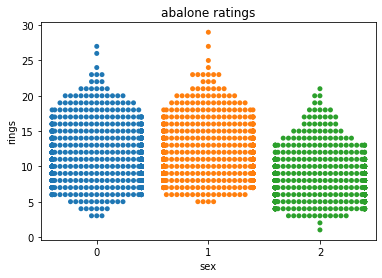

In [21]:
bx = sns.swarmplot(x="Sex", y="Rings", data = data);
bx.set(xlabel='sex', ylabel='rings', title='abalone ratings')

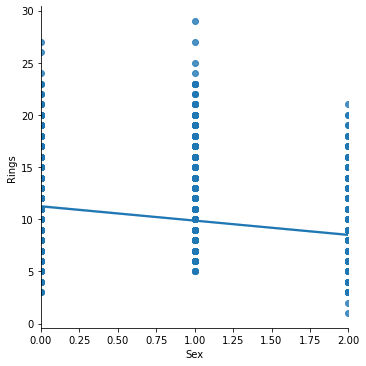

In [22]:
sns.lmplot(x = "Sex", y = "Rings", data = data)

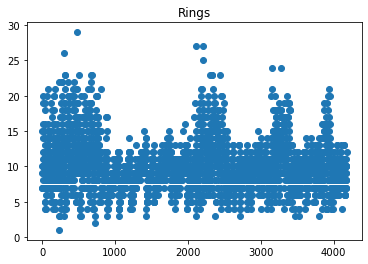

In [24]:
plt.scatter(data.index,data['Rings'])      #univariate analysis
plt.title('Rings')
plt.show()

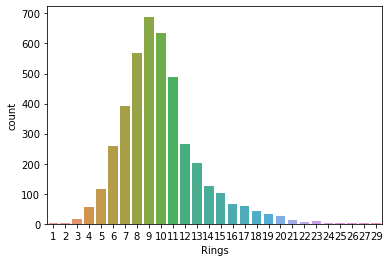

In [25]:
sns.countplot(data['Rings']);

this shows the class imbalance problem

<AxesSubplot:xlabel='Rings', ylabel='Density'>

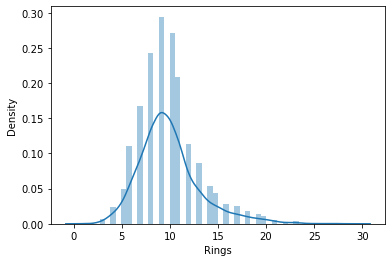

In [27]:
sns.distplot(data['Rings'])

data is equally distributed

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

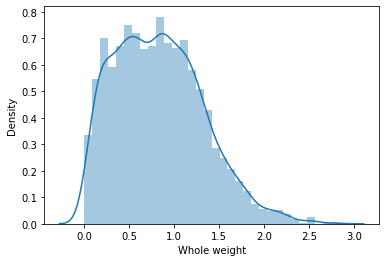

In [26]:
sns.distplot(data['Whole weight'])

data is not equally distributed

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

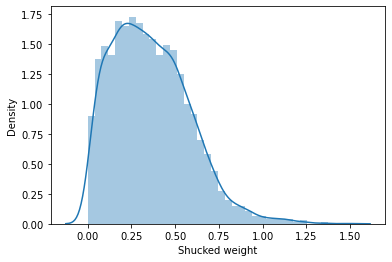

In [28]:
sns.distplot(data['Shucked weight'])

data is equally distributed

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

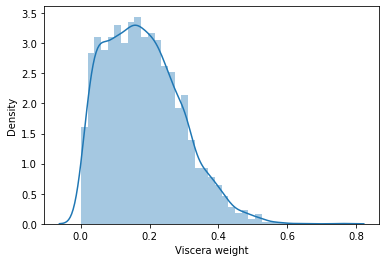

In [29]:
sns.distplot(data['Viscera weight'])

data is equally distributed

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

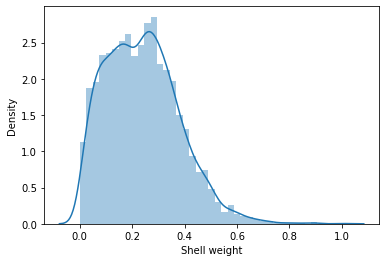

In [30]:
sns.distplot(data['Shell weight'])

data is equally distributed

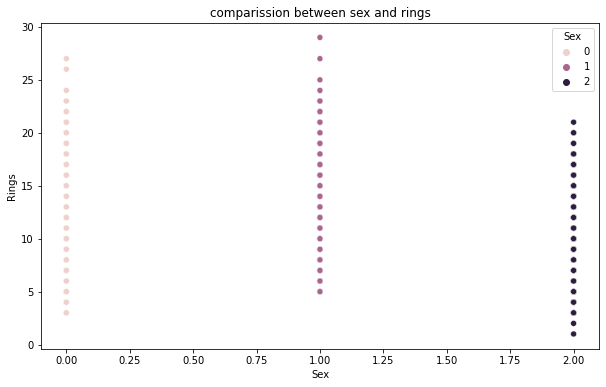

In [32]:
plt.figure(figsize=[10,6])
plt.title('comparission between sex and rings')
sns.scatterplot(data['Sex'],data['Rings'],hue =data['Sex']);

on x-axis there is sex and on y axis there is rings

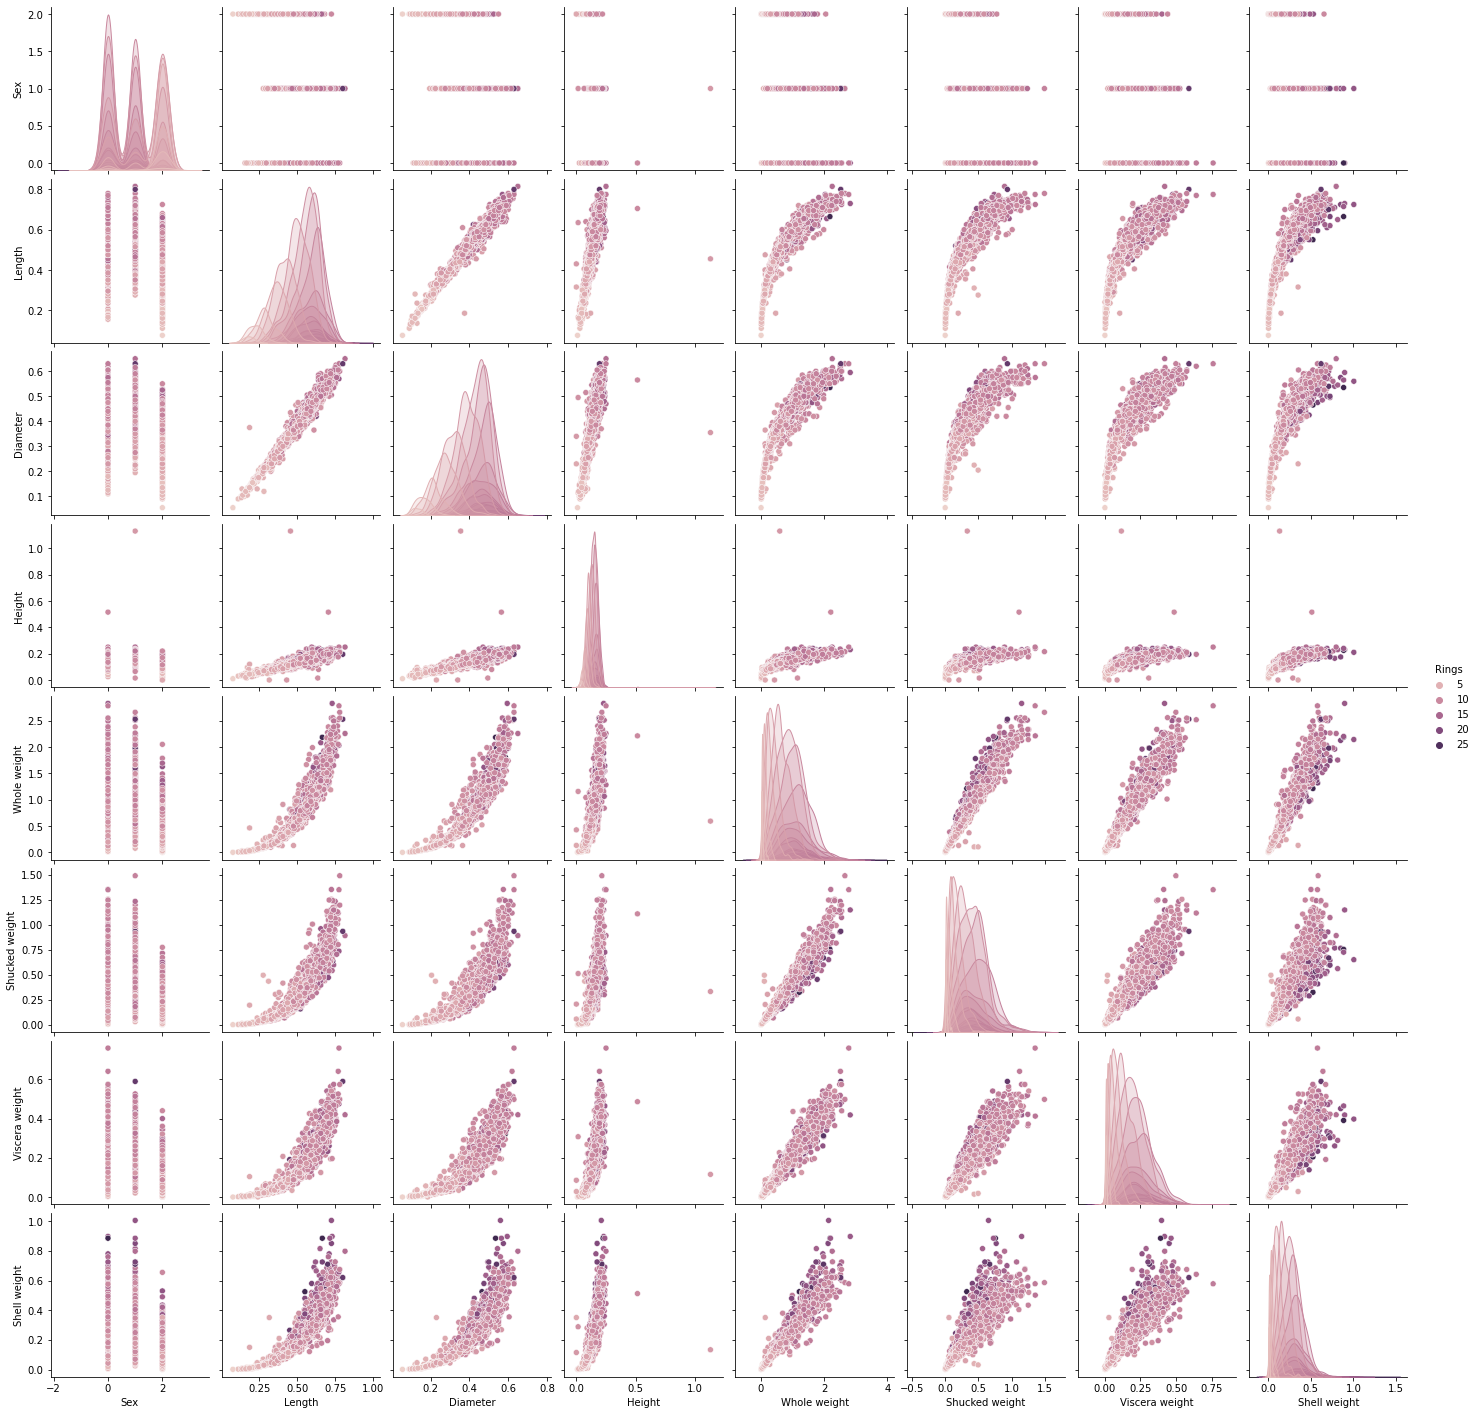

In [33]:
sns.pairplot(data,hue='Rings')            #multivariate analysis

In [34]:
cor=data.corr()

In [35]:
cor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

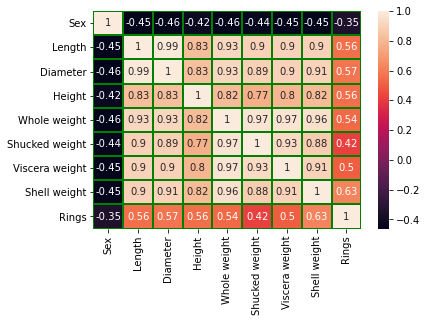

In [36]:
sns.heatmap(cor,annot=True,linewidths=1,linecolor='green')

In [37]:
from sklearn.preprocessing import LabelEncoder           #label encoding
LE=LabelEncoder()
data['Sex']=LE.fit_transform(data['Sex'])

In [38]:
data['Sex'].unique()

array([0, 1, 2], dtype=int64)

In [39]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


outliers removal

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(data))
new_data=data[(z<3).all(axis=1)]

In [42]:
new_data.shape

(4027, 9)

In [43]:
data.shape

(4177, 9)

In [44]:
4177-4027

150

In [45]:
(150/4177)*100

3.5910940866650707

i lost 3.5% data by removing the outliers

In [47]:
new_data.skew()

Sex               0.062158
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

there is no skewness because we have removed outliers first

In [48]:
x=new_data.drop('Sex',axis=1)
y=new_data['Sex']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=30,random_state=1)
    mod=DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred= mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print('best accuracy is',maxAccu,'on random_state',maxRS)        
        

best accuracy is 0.43333333333333335 on random_state 1


In [51]:
 x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=30,random_state=1)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [53]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred=DTC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.25      0.38      0.30         8
           1       0.50      0.38      0.43        13
           2       0.38      0.33      0.35         9

    accuracy                           0.37        30
   macro avg       0.38      0.36      0.36        30
weighted avg       0.40      0.37      0.37        30



dtc is giving 37% accuracy 

In [55]:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.88      0.54      0.67        13
           2       0.67      0.44      0.53         9

    accuracy                           0.60        30
   macro avg       0.66      0.62      0.59        30
weighted avg       0.70      0.60      0.60        30



rfc is giving 60% accuracy

In [56]:
SV= SVC()
SV.fit(x_train,y_train)             #support vector classifier
pred=SV.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.30      0.75      0.43         8
           1       0.00      0.00      0.00        13
           2       0.70      0.78      0.74         9

    accuracy                           0.43        30
   macro avg       0.33      0.51      0.39        30
weighted avg       0.29      0.43      0.34        30



svc is giving 43% accuracy

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.48771419324014


In [59]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.5455700260468843


In [60]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.5291808331920536


RANDOM FOREST CLASSIFIER is the best model because best accuracy and least difference

hyper parameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [113]:
parameter={'max_depth':np.arange(2,10),
           'max_features':['auto', 'sqrt', 'log2'],
          'criterion':['gini','entropy']}

In [114]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [115]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [116]:
GCV.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [117]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [120]:
Final_mod = DecisionTreeClassifier(criterion='entropy',max_depth=8,max_features='log2')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

43.333333333333336
